In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
# 多行输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

# 精调通用语言模型用于文本分类

In [2]:
from fastai import *
from fastai.text import *
from fastai.core import *
import bz2

- 基于中文维基百科训练

In [3]:
bs = 64
lang = 'zh'

In [4]:
data_path = Config.data_path()
data_path

PosixPath('/home/lab/.fastai/data')

- 提取TXT文件放在 docs 文件夹下

In [5]:
name = f'{lang}wiki'
path = data_path/name
path.mkdir(exist_ok=True, parents=True)
dest = path/'docs'
lm_fns = [f'{lang}_wt', f'{lang}_wt_vocab']

- 下载的文件为 xml 格式
- 大概有 46480 词目

In [6]:
xml_fn = f"{lang}wiki-latest-pages-articles.xml"
zip_fn = f"{xml_fn}.bz2"

In [7]:
# def bunzip(fn:PathOrStr):
#     "bunzip `fn`, raising exception if output already exists"
#     fn = Path(fn)
#     assert fn.exists(), f"{fn} doesn't exist"
#     out_fn = fn.with_suffix('')
#     assert not out_fn.exists(), f"{out_fn} already exists"
#     with bz2.BZ2File(fn, 'rb') as src, out_fn.open('wb') as dst:
#         for d in iter(lambda: src.read(1024*1024), b''): dst.write(d)

# @contextmanager
# def working_directory(path:PathOrStr):
#     "Change working directory to `path` and return to previous on exit."
#     prev_cwd = Path.cwd()
#     os.chdir(path)
#     try: yield
#     finally: os.chdir(prev_cwd)

- 提取信息

In [8]:
def get_wiki():
    if not (path/xml_fn).exists():
        print("downloading...")
        download_url(f'https://dumps.wikimedia.org/{name}/latest/{zip_fn}', path/zip_fn)
        print("unzipping...")
        bunzip(path/zip_fn)
        
    with working_directory(path):
        if not (path/'wikiextractor').exists(): os.system('git clone https://github.com/attardi/wikiextractor.git')
        print("extracting...")
        os.system("python wikiextractor/WikiExtractor.py --processes 4 --no_templates " +
            f"--min_text_length 1800 --filter_disambig_pages --log_file log -b 100G -q {xml_fn}")
    shutil.move(str(path/'text/AA/wiki_00'), str(path/name))
    shutil.rmtree(path/'text')

In [9]:
if not (path/name).exists(): get_wiki()

In [10]:
path.ls()

[PosixPath('/home/lab/.fastai/data/zhwiki/log'),
 PosixPath('/home/lab/.fastai/data/zhwiki/train.csv'),
 PosixPath('/home/lab/.fastai/data/zhwiki/zhwiki'),
 PosixPath('/home/lab/.fastai/data/zhwiki/zh_textlist_class'),
 PosixPath('/home/lab/.fastai/data/zhwiki/models'),
 PosixPath('/home/lab/.fastai/data/zhwiki/docs'),
 PosixPath('/home/lab/.fastai/data/zhwiki/val.csv'),
 PosixPath('/home/lab/.fastai/data/zhwiki/zh_databunch'),
 PosixPath('/home/lab/.fastai/data/zhwiki/zhwiki-latest-pages-articles.xml.bz2'),
 PosixPath('/home/lab/.fastai/data/zhwiki/wikiextractor')]

In [11]:
!head -n20 {path}/zhwiki

<doc id="13" url="https://zh.wikipedia.org/wiki?curid=13" title="数学">
数学

数学是利用符号语言研究數量、结构、变化以及空间等概念的一門学科，从某种角度看屬於形式科學的一種。數學透過抽象化和邏輯推理的使用，由計數、計算、量度和對物體形狀及運動的觀察而產生。數學家們拓展這些概念，為了公式化新的猜想以及從選定的公理及定義中建立起嚴謹推導出的定理。

基礎數學的知識與運用總是個人與團體生活中不可或缺的一環。對數學基本概念的完善，早在古埃及、美索不達米亞及古印度內的古代數學文本便可觀見，而在古希臘那裡有更為嚴謹的處理。從那時開始，數學的發展便持續不斷地小幅進展，至16世紀的文藝復興時期，因为新的科學發現和數學革新兩者的交互，致使數學的加速发展，直至今日。数学并成为許多國家及地區的教育範疇中的一部分。

今日，數學使用在不同的領域中，包括科學、工程、醫學、經濟學和金融學等。數學對這些領域的應用通常被稱為應用數學，有時亦會激起新的數學發現，並導致全新學科的發展，例如物理学的实质性发展中建立的某些理论激发数学家对于某些问题的不同角度的思考。數學家也研究純數學，就是數學本身的实质性內容，而不以任何實際應用為目標。雖然許多研究以純數學開始，但其过程中也發現許多應用之处。

西方语言中“數學”（）一詞源自於古希臘語的（），其有“學習”、“學問”、“科學”，以及另外還有個較狹義且技術性的意思－「數學研究」，即使在其語源內。其形容詞（），意思為"和學習有關的"或"用功的"，亦會被用來指"數學的"。其在英语中表面上的複數形式，及在法语中的表面複數形式'，可溯至拉丁文的中性複數'，由西塞罗譯自希臘文複數（），此一希臘語被亚里士多德拿來指「萬物皆數」的概念。

汉字表示的「數學」一詞大約产生于中国宋元時期。多指象數之學，但有時也含有今天上的數學意義，例如，秦九韶的《數學九章》（《永樂大典》記，即《數書九章》也被宋代周密所著的《癸辛雜識》記爲《數學大略》）、《數學通軌》（明代柯尚遷著）、《数学钥》（清代杜知耕著）、《數學拾遺》（清代丁取忠撰）。直到1939年，經過中國數學名詞審查委員會研究“算學”與“數學”兩詞的使用狀況後，確認以“數學”表示今天意義上的數學含義。

數學有着久遠的歷史。它被認為起源於人類早期的生產活動：中國古代

- 分割为 TXT 文件

In [12]:
def split_wiki():
    dest.mkdir(exist_ok=True, parents=True)
    title_re = re.compile(rf'<doc id="\d+" url="https://{lang}.wikipedia.org/wiki\?curid=\d+" title="([^"]+)">')
    lines = (path/name).open()
    f=None

    for i,l in enumerate(lines):
#         if i%100000 == 0: print(i)
        if l.startswith('<doc'):
            title = title_re.findall(l)[0].replace('/','_')
            if f: f.close()
            f = (dest/f'{title}.txt').open('w')
        else: f.write(l)
    f.close()

In [13]:
if not dest.exists(): split_wiki()

In [14]:
dest.ls()[:5]

[PosixPath('/home/lab/.fastai/data/zhwiki/docs/Super Junior.txt'),
 PosixPath('/home/lab/.fastai/data/zhwiki/docs/三九政变.txt'),
 PosixPath('/home/lab/.fastai/data/zhwiki/docs/1941年德克萨斯飓风.txt'),
 PosixPath('/home/lab/.fastai/data/zhwiki/docs/中国人民解放军浙江省舟山警备区.txt'),
 PosixPath('/home/lab/.fastai/data/zhwiki/docs/傑克·切斯伯.txt')]

In [15]:
!head {dest}/'Super Junior.txt'

Super Junior

Super Junior（），簡稱為SJ 或SuJu（），是韓國SM娱樂於2005年推出的流行音樂男子組合，出道初期由12名成員組成，成員包括：利特、希澈、韓庚、藝聲、強仁、神童、晟敏、銀赫、東海、始源、厲旭及起範。2006年起，圭賢加入Super Junior成為第13位成員。2015年11月6日，在Super Junior出道十周年之際，宣布設立獨立工作室廠牌《Label SJ》，專屬負責其專輯製作、經紀管理等方面的事業。

2009年至2012年，Super Junior連續四年獲得韓國唱片銷量總冠軍。另外，Super Junior獲得韓國金唱片獎三屆唱片大賞、五屆唱片本賞、七次人氣獎，成為在韓國金唱片頒獎典禮中取得最多獎項的歌手以及第一個蟬聯金唱片大賞的團體。2011年，Super Junior在Mnet亞洲音樂大獎獲得最佳男子團體、年度專輯大獎，2012年獲得全球最佳男子團體並蟬聯年度專輯大獎，同時亦成為在該音樂頒獎禮中獲得最多獎項的歌手其中之一。除此之外，他們在2011年獲得韓國首爾歌謠大賞的大賞及本賞，成為該年度韓國三大頒獎典禮的大賞得主，奠定其在樂壇不可撼動的地位。

由於組合人數眾多，成員亦各有所長，為了活動不受限制，涉足不同的音樂類型，自出道以來一共建立了五個子團體。他們在歌手、演員、主持人、DJ及模特等多方面全方位發展，成員們演藝活動經驗豐富，活躍於演藝圈各個領域之中，發展優秀且獲獎無數。迄今為止，Super Junior已發行的9張韓語正規專輯及1張日語正規專輯均取得卓越成績。Super Junior作為第一隊將K-pop推向世界的組合，一直被傳媒冠以「韓流帝王」之稱號。

Super Junior的官方歌迷名稱是E.L.F.（韓語：엘프），意思是Ever Lasting Friends（永遠的朋友），2006年6月2日正式公開，由隊長利特命名。應援色是寶藍色(Sapphire Blue)。



### 创建数据

- token和数值

In [16]:
# !pip install sentencepiece

In [17]:
# data = (TextList.from_folder(dest, processor=[OpenFileProcessor(), SPProcessor()])
#             .split_by_rand_pct(0.1, seed=42)
#             .label_for_lm()           
#             .databunch(bs=bs, num_workers=4))

In [18]:
# len(data.vocab.itos),len(data.train_ds)

In [19]:
# data.save(path/f'{lang}_databunch')

In [20]:
path.ls()

[PosixPath('/home/lab/.fastai/data/zhwiki/log'),
 PosixPath('/home/lab/.fastai/data/zhwiki/train.csv'),
 PosixPath('/home/lab/.fastai/data/zhwiki/zhwiki'),
 PosixPath('/home/lab/.fastai/data/zhwiki/zh_textlist_class'),
 PosixPath('/home/lab/.fastai/data/zhwiki/models'),
 PosixPath('/home/lab/.fastai/data/zhwiki/docs'),
 PosixPath('/home/lab/.fastai/data/zhwiki/val.csv'),
 PosixPath('/home/lab/.fastai/data/zhwiki/zh_databunch'),
 PosixPath('/home/lab/.fastai/data/zhwiki/zhwiki-latest-pages-articles.xml.bz2'),
 PosixPath('/home/lab/.fastai/data/zhwiki/wikiextractor')]

In [21]:
data = load_data(path, f'{lang}_databunch', bs=bs)

In [22]:
data.show_batch()

idx,text
0,"。 广州市 广播电视 台 是 该公司 的 实际 控制 单位 。 ▁在 广州 , 该公司 的 长期 竞争 对手 是 广东 有 线 ( 省 有 线 ), 至 2011 年 因 广 电 总局 要求 “ 一 省 一 网 ” 的政策 , 并入 广东 有 线 成为 其 子公司 , 但 在香港 及其他 境外 频道 插 播 广告 方面 仍然是 两 网 各自 分开 , 所有 境外 频道"
1,"只有 41 人 。 1917 年 十月 革命 后 , 有 7000 名 俄国 难民 蜂 拥 抵 沪 , 其中包括 前 贵族 。 1931 年 , 日本 占领 东北 后 , 又有 大批 俄 侨 从 哈尔滨 转移到 上海 。 30 年代 上海 俄 侨 总数 为 1.5 万 到 2 万人 。 ▁ 1934 年 , 法租界 有 俄 侨 8 260 人 。 ( 公共 租界 1935"
2,"兩年 , 並 於同年 推出 第二 張 翻唱 碟 《 e vol ve 》 , 再度 問 鼎 香港 唱片 商 會 銷量 榜 冠軍 3 週 。 ▁陳 慧 嫻 生於 香港 , 籍 貫 廣東 番 禺 , 是 家中 長 女 , 有一個 小 一 歲 的妹妹 和 一個 小 十 歲 的弟弟 ( 其 弟 是 劉 浩 龍 的 小學 同學 )。 父親 陳 澄"
3,"拍 。 但 这些 影片 都 称 不 上 是 恐怖 片 , 只 不过 是以 旧 时代 为 背景 的 时代 剧 而已 。 观众 看 过 这些 影片 后 还 对 鬼 会产生 怜 悯 之心 。1950 年代末 和 1960 年代初 , 韩国 从 有 “ 吸血鬼 大 本 营 ” 之 称 的 英国 海 默 电影 公司 和美国 环球 电影 公司 引进 了 一批 让 观众"
4,"-{ 阿 迪 达 斯 | zh - hk : ad ida s ; zh - tw : 爱 迪斯 ; zh - cn : 阿 迪 达 斯 }- 有可能 奪得 「 鳥 巢 」 的 冠名 權 , 代價 是 每年 7000 萬元 人民幣 。 相當於 每 回 $ 13 44 。 ▁2009 年 4 月 2 日 , 國際 巨星 成 龍 宣佈 於 5 月 1"


In [23]:
data.vocab.itos[120: 130]

['第', '水', ')。', '可以', '外', '因', '天', '南', '自', '成']

- 模型配置

In [ ]:
awd_lstm_lm_config

{'emb_sz': 400,
 'n_hid': 1152,
 'n_layers': 3,
 'pad_token': 1,
 'qrnn': False,
 'bidir': False,
 'output_p': 0.1,
 'hidden_p': 0.15,
 'input_p': 0.25,
 'embed_p': 0.02,
 'weight_p': 0.2,
 'tie_weights': True,
 'out_bias': True}

- 不使用预训练权重，我们从头训练，使用中文维基百科

In [ ]:
learn = language_model_learner(data, AWD_LSTM, drop_mult=0.5, pretrained=False).to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


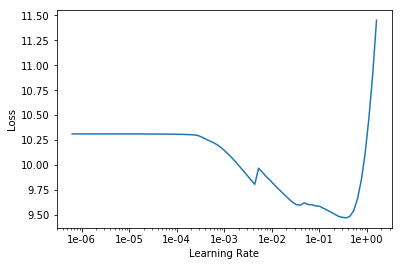

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr = 1e-2
lr *= bs/48  # Scale learning rate by batch size
# 所有层都是可以训练的
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(10, lr, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


- 保存模型权重与字典

In [ ]:
path.ls()

In [ ]:
mdl_path = path/'models'
mdl_path.mkdir(exist_ok=True)
learn.to_fp32().save(mdl_path/lm_fns[0], with_opt=False)
learn.data.vocab.save(mdl_path/(lm_fns[1].with_suffix('.pkl')))

In [ ]:
TEXT = "中国"
N_WORDS = 40
N_SENTENCES = 2

In [ ]:
print("\n\n".join(learn.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

### 进行语义分析任务
- 参看 [中文数据集](BERT.ipynb)

In [ ]:
root = Config.data_path()/r'xiecheng'

In [ ]:
!cp {root}/'train.csv' {root}/'val.csv' {path}

In [ ]:
path.ls()

In [ ]:
train_df = pd.read_csv(path/'train.csv')
train_df.head()

In [ ]:
test_df = pd.read_csv(path/'val.csv')
test_df.head()

In [ ]:
df = pd.concat([train_df,test_df], sort=False)

In [ ]:
data_lm = (TextList.from_df(df, path, cols='review', processor=[
    OpenFileProcessor(), SPProcessor.load(dest)], vocab=data.vocab)
    .split_by_rand_pct(0.1, seed=42)
    .label_for_lm()
    .databunch(bs=bs, num_workers=4))

In [ ]:
data_lm.save(f'{lang}_clas_databunch')

In [ ]:
data_lm = load_data(f'{lang}_clas_databunch', bs=bs)

In [ ]:
data_lm.show_batch()

### 使用我们之前训练的模型学习一个语言模型

- `pretrained_fnames=lm_fns`

In [ ]:
lm_fns

In [ ]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, pretrained_fnames=lm_fns, drop_mult=1.0, wd=0.1)

In [ ]:
lr = 1e-3
lr *= bs/48

In [ ]:
learn_lm.fit_one_cycle(2, lr*10, moms=(0.8,0.7))

In [ ]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(8, lr, moms=(0.8,0.7))

In [ ]:
learn_lm.save(f'{lang}fine_tuned')
learn_lm.save_encoder(f'{lang}fine_tuned_enc')

In [ ]:
TEXT = '我喜欢'

In [ ]:
print("\n\n".join(learn_lm.predict(TEXT, N_WORDS, temperature=0.9) for _ in range(N_SENTENCES)))

In [ ]:
len(data_lm.train_ds)

### 分类

In [ ]:
data_clas = (TextList.from_df(train_df, path, , processor=[
    OpenFileProcessor(), SPProcessor.load(dest)], vocab=data_lm.vocab, cols='review')
    .split_by_rand_pct(0.1, seed=42)
    .label_from_df(cols='label')
    .databunch(bs=bs, num_workers=4))

data_clas.save(f'{lang}_textlist_class')

In [ ]:
data_clas = load_data(path, f'{lang}_textlist_class', bs=bs, num_workers=4)

In [ ]:
@np_func
def f1(inp,targ): return f1_score(targ, np.argmax(inp, axis=-1))

In [ ]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, pretrained=False, drop_mult=0.5, wd=0.1, metrics=[f1, accuracy]).to_fp16()
learn_c.load_encoder(f'{lang}fine_tuned_enc')
learn_c.freeze()

In [ ]:
lr=2e-2
lr *= bs/48

In [ ]:
learn_c.fit_one_cycle(8, lr, moms=(0.8,0.7))

In [ ]:
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(3, slice(lr/(2.6**4),lr), moms=(0.8,0.7))

In [ ]:
learn_c.freeze_to(-3)
learn_c.fit_one_cycle(3, slice(lr/(2.6**4),lr), moms=(0.8,0.7))

In [ ]:
learn_c.unfreeze()
learn_c.fit_one_cycle(5, slice(lr/10/(2.6**4),lr/10), moms=(0.8,0.7))

In [ ]:
learn_c.save(f'{lang}clas')